In [1]:
import sys


In [2]:
print(sys.version_info[0])

3


In [3]:
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [4]:
import os

In [5]:
print(os.environ['PATH'])

/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [6]:
import osgeo

In [7]:
from osgeo import gdal

In [8]:
osgeo.gdal.UseExceptions() 

In [9]:
import gdalconst

In [10]:
gdal.AllRegister()

In [11]:
driver = gdal.GetDriverByName('HFA')
driver.Register()

6

In [12]:
fn = 'john.img'
ds = gdal.Open(fn)
if ds is None:
    print('Could not open '+fn)

In [13]:
cols = ds.RasterXSize
rows = ds.RasterYSize
bamds = ds.RasterCount

In [14]:
print(ds)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f16a91d4f30> >


In [15]:
geotransform = ds.GetGeoTransform()

In [16]:
print(geotransform)

(90759.0, 1.0, 0.0, 755904.0, 0.0, -1.0)


In [17]:
originX = geotransform[0]
originY = geotransform[3]
pixelWidth = geotransform[1]
pixelHeight = geotransform[5]

In [18]:
print ('Xo - '+str(originX))
print ('Yo - '+str(originY))
print ('pW - '+str(pixelWidth))
print ('pH - '+str(pixelHeight))

Xo - 90759.0
Yo - 755904.0
pW - 1.0
pH - -1.0


In [19]:
x=90765
y=755900
xOffset=int((x-originX)/pixelWidth)
yOffset=int((y-originY)/pixelHeight)
print(xOffset)
print(yOffset)

6
4


In [20]:
band = ds.GetRasterBand(1)
data = band.ReadAsArray(xOffset,yOffset,1,1)
print(data)

[[0.]]


In [21]:
value = data[0,0]
print(value)

0.0


In [22]:
x=96911
y=745169
print(value)

0.0


In [23]:
xOffset=int((x-originX)/pixelWidth)
yOffset=int((y-originY)/pixelHeight)
print(xOffset)
print(yOffset)
band = ds.GetRasterBand(1)
data = band.ReadAsArray(xOffset,yOffset,1,1)
value = data[0,0]
print(value)

6152
10735
12.23


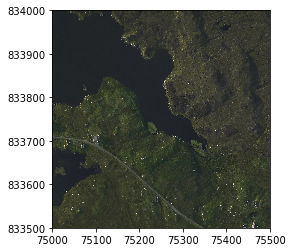

In [24]:
import rasterio
from rasterio.plot import show
src = rasterio.open('P0006643.tif')
show(src)